Repo: https://github.com/nytimes/covid-19-data
<li> Calculate the total number of confirmed cases & deaths broken down by county for Connecticut
<li> Given the data that you calculate, present that visually any way. Note this homework is not going to be judging on UX design

In [1]:
"""
!pip install pandas 
!pip install plotly==3.10.0
"""

'\n!pip install pandas \n!pip install plotly==3.10.0\n'

In [2]:
# load libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load visualization library
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)

In [4]:
# load data
df = pd.read_csv('data/us-counties.csv')

# source: https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-09.xlsx
connecticut_population_data = {
'Fairfield': 943332,
'Hartford': 891720,
'Litchfield': 180333,
'Middlesex': 162436,
'New Haven': 854757,
'New London': 265206,
'Tolland': 150721,
'Windham': 116782,
'Unknown': -1 # because of the unknown county in reported cases
}

In [5]:
# peek through the data
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [6]:
# filter out everything except Connecticut
connecticut_df = df[df.state == 'Connecticut']

In [7]:
# add population data to connecticut dataframe
connecticut_df['population'] = connecticut_df.county.apply(lambda x: connecticut_population_data[x])

In [8]:
# peek 
connecticut_df.head(3)

,date,county,state,fips,cases,deaths,population
777,2020-03-08,Fairfield,Connecticut,9001.0,1,0,943332
894,2020-03-09,Fairfield,Connecticut,9001.0,2,0,943332
1029,2020-03-10,Fairfield,Connecticut,9001.0,2,0,943332


In [10]:
print(f' Total number of records for Connecticut state: {connecticut_df.shape[0]}')

 Total number of records for Connecticut state: 251


In [11]:
print(f'Number of days reported for each county:\n{connecticut_df.county.value_counts()}')

Number of days reported for each county:
Fairfield     37
Litchfield    33
New Haven     31
Hartford      31
Middlesex     27
Tolland       26
Windham       26
New London    25
Unknown       15
Name: county, dtype: int64


In [12]:
first_case = connecticut_df[connecticut_df.date == connecticut_df.date.min()]
print(f'First case in Connecticut reported in {first_case.county.values[0]} county on {first_case.date.values[0]}')

First case in Connecticut reported in Fairfield county on 2020-03-08


In [13]:
# reset index
connecticut_df.reset_index(inplace=True)

# drop state & old index we don't need it
connecticut_df.drop(columns=['state', 'index'], inplace=True)

# check data types
connecticut_df.dtypes

date           object
county         object
fips          float64
cases           int64
deaths          int64
population      int64
dtype: object

In [14]:
# No NaNs except fips code for UNKNOWN county
connecticut_df.isna().sum()

date           0
county         0
fips          15
cases          0
deaths         0
population     0
dtype: int64

### Total Number of Confirmed Cases & Deaths by County 

In [18]:
aggregated_df = connecticut_df[['county', 'cases', 'deaths']].groupby(['county']).max()

# sort the data frame by cases inplace ascendng order
aggregated_df.sort_values(by=['cases'], inplace=True, ascending=False)

aggregated_df

,cases,deaths
county,,
Fairfield,6004,262
New Haven,3358,135
Hartford,2243,133
Unknown,501,5
Litchfield,446,24
Middlesex,339,19
New London,222,7
Tolland,195,17
Windham,83,1


In [19]:
# grouped counties, removed unknown and sorted by cases
connecticut_df[['county', 'cases', 'population', 'deaths']].groupby(['county']).max().where(lambda x: x.population>0).dropna().sort_values(['cases'], ascending=False)

,cases,population,deaths
county,,,
Fairfield,6004.0,943332.0,262.0
New Haven,3358.0,854757.0,135.0
Hartford,2243.0,891720.0,133.0
Litchfield,446.0,180333.0,24.0
Middlesex,339.0,162436.0,19.0
New London,222.0,265206.0,7.0
Tolland,195.0,150721.0,17.0
Windham,83.0,116782.0,1.0


#### Cases and Population are almost directly proportional. Makes Sense!

### Visualize aggregated data

<Figure size 432x288 with 0 Axes>

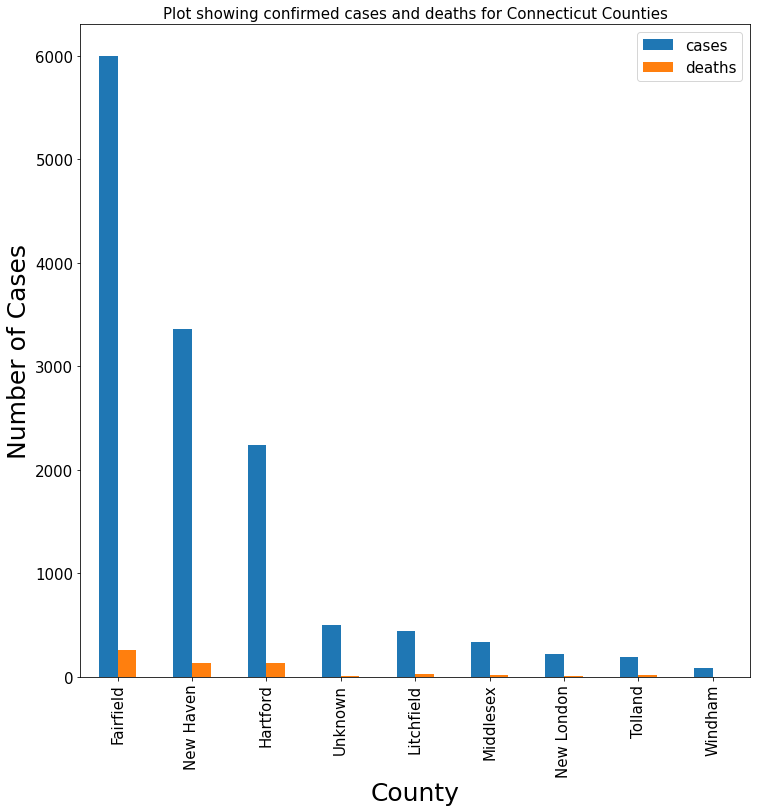

In [20]:
fig = plt.figure()
aggregated_df.plot.bar(figsize=(12,12))
plt.xlabel("County", fontsize=25)
plt.ylabel("Number of Cases", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Plot showing confirmed cases and deaths for Connecticut Counties", fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Analysis for per 0.1M of popupulation

In [21]:
agg_df_v2 = connecticut_df[['county', 'cases', 'population', 'deaths']].groupby(['county']).max().where(lambda x: x.population>0).dropna().sort_values(['cases'], ascending=False)

In [22]:
# calculate cases and deaths per 100000 of population
agg_df_v2['cases per 0.1M'] = round((100000 * agg_df_v2['cases'])/agg_df_v2['population'])
agg_df_v2['deaths per 0.1M'] = round((100000 * agg_df_v2['deaths'])/agg_df_v2['population'])

# change types of both columns to int32
agg_df_v2 = agg_df_v2.astype({'cases per 0.1M': 'int32', 'deaths per 0.1M': 'int32'})
agg_df_v2

,cases,population,deaths,cases per 0.1M,deaths per 0.1M
county,,,,,
Fairfield,6004.0,943332.0,262.0,636,28
New Haven,3358.0,854757.0,135.0,393,16
Hartford,2243.0,891720.0,133.0,252,15
Litchfield,446.0,180333.0,24.0,247,13
Middlesex,339.0,162436.0,19.0,209,12
New London,222.0,265206.0,7.0,84,3
Tolland,195.0,150721.0,17.0,129,11
Windham,83.0,116782.0,1.0,71,1


### Visualize cases & deaths per 0.1M

<Figure size 432x288 with 0 Axes>

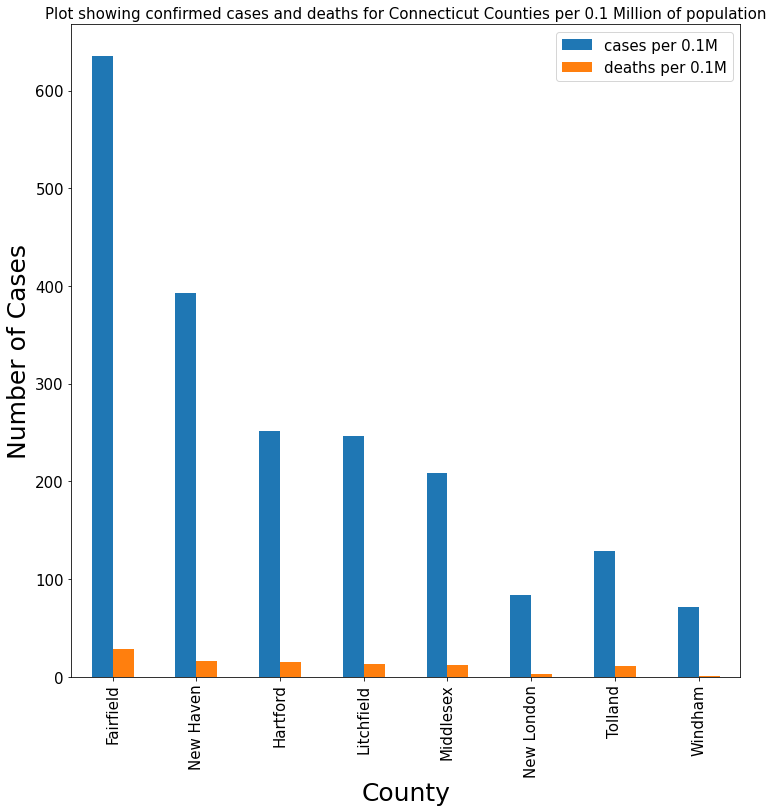

In [23]:
fig = plt.figure()
agg_df_v2[['cases per 0.1M', 'deaths per 0.1M']].plot.bar(figsize=(12,12))
plt.xlabel("County", fontsize=25)
plt.ylabel("Number of Cases", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Plot showing confirmed cases and deaths for Connecticut Counties per 0.1 Million of population", fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Summary
1. Fairfield has highest number of confirmed cases and deaths.
2. Windham has lowest number of confirmed cases and deaths.
3. Population and cases are almost directly proportional

## Interactive Plotly Plots 

In [59]:

layout_bar = go.Layout(dict(
    title='Bar Plot Showing Total Cases & Deaths in Connecticut Counties',
    titlefont= dict(size=20),
    xaxis=dict(
        title= "County",
        titlefont= dict( 
        size = 20
        ),
        tickfont = dict(size=15)
    ),

    yaxis1=dict(
        title='Count',
        titlefont= dict( 
        size = 20
        ),
        tickfont = dict(size=15)
    ),
))


figp = go.Figure(data=[
    go.Bar(name='Cases', x=aggregated_df.index, y=aggregated_df.cases),
    go.Bar(name='Deaths', x=aggregated_df.index, y=aggregated_df.deaths)
],
layout=layout_bar)

In [60]:
plot(figp, filename='bar_plot_cases_deaths.html')

'bar_plot_cases_deaths.html'

## Interactive Line Charts Showing All Counties Cases and Deaths in Single plot

In [26]:
all_plots = []
for ind, county in enumerate(connecticut_df.county.unique()):
    tmp = connecticut_df[connecticut_df.county==county]
    tmp.index = pd.to_datetime(tmp.date)
    cases_line_plots = go.Scatter(
        name=county +' Cases',
        x=tmp.index,
        y=tmp.cases.values,
        line = dict(color = 'green'),
        mode='lines+markers',
        opacity = 0.5,
        visible = 'legendonly',
        legendgroup="group"+str(ind)
    )
    deaths_dotted_line_plots = go.Scatter(
        name=county+' Deaths',
        x=tmp.index,
        y=tmp.deaths,
        line=dict(color = 'red', dash='dot'),
        mode='lines+markers',
        visible = 'legendonly',
        legendgroup="group"+str(ind)
    )
    all_plots.append(cases_line_plots)
    all_plots.append(deaths_dotted_line_plots)

In [61]:
layout_line_chart = go.Layout(dict(
    title='Line Charts Showing Total Cases & Deaths in Connecticut Counties \n *(click on the legend on the right to select the county)',
    titlefont= dict(size=20),
    xaxis=dict(
        title= "Date",
        titlefont= dict( 
        size = 20
        ),
        tickfont = dict(size=15)
    ),

    yaxis1=dict(
        title='Count',
        titlefont= dict( 
        size = 20
        ),
        tickfont = dict(size=15)
    ),
))

all_plots[0].visible = True
all_plots[1].visible = True  # make one county data visible on plot
fig_line_chart = go.Figure(data=all_plots, layout=layout_line_chart)

In [62]:
plot(fig_line_chart, filename='line_chart_for_all_counties_cases_deaths.html')

'line_chart_for_all_counties_cases_deaths.html'

# Extra Analysis

### Percent Change in Growth

In [66]:
connecticut_df = df[df.state == 'Connecticut']
all_plots_growth = []
for ind, county in enumerate(connecticut_df.county.unique()):
    tmp = connecticut_df[connecticut_df.county==county]
    percentage_bar_plot = go.Bar(
        name=county,
        y=tmp.cases.pct_change().values * 100,
        x=tmp.date.values,
        opacity = 0.5,
        visible = "legendonly"
    )
    all_plots_growth.append(percentage_bar_plot)

In [69]:
layout_bar_growth = go.Layout(dict(
    title='Bar Plot Showing Cases Percentage Growth in Connecticut Counties  *(choose county from the legend)',
    titlefont= dict(size=20),
    xaxis=dict(
        title= "Date",
        titlefont= dict(size = 20),
        tickfont = dict(size=15)
    ),

    yaxis1=dict(
        title='Percentage',
        titlefont= dict(size = 20),
        tickfont = dict(size=15)
    ),
))

all_plots_growth[0].visible = True
fig_growth_bar = go.Figure(data= all_plots_growth,
layout=layout_bar_growth
)

In [70]:
plot(fig_growth_bar, filename='Percentage_Change_Growth_All_Counties.html')

'Percentage_Change_Growth_All_Counties.html'